# Sideproject: Using `pandas` and `seaborn` to analyze Stackoverflow Developer Survey results !


## * Work in progress. Not ready for viewing yet...

This file will include Loading, Cleaning, Wrangling, and the initial steps of Explorative analysis. 

Later I will separate the Loading + Transformation from Analysis and then from Insights / Vis.

## Load the Data

`df` = survey results

`dfs` = question schema

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../raw-data/2022-stack-dev-surv/survey_results_public.csv')
dfs =  pd.read_csv('../raw-data/2022-stack-dev-surv/survey_results_schema.csv')
df.head()



C:\Users\mariu\AppData\Local\Temp\ipykernel_40864\938543504.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [2]:

#Show us all of the columns
pd.set_option('display.max_columns', None)
df.head()


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

### Renames for clarity

In [3]:
df.rename(columns = {'ResponseId':'ResponseID'}, inplace = True)

### Cleansing and post processing in order to read the contents in the order in which they were asked


In [4]:
# dfs will hold the qid stripped away to its number component
dfs['qid'] = dfs['qid'].apply(lambda x: x.replace('QID', ''))

#qid column will now hold an integer value, not a string
dfs['qid'] = pd.to_numeric(dfs['qid'])

## Project planning

In [5]:


"""

To split in a few tables:
- Participants - who they are (Basic Info + Demographics)
- Education and learning (Education+Work+Career, Work experience)
- Work (employment, career, teams/work experience)

I will use the Tech and culture to focus on Data Science ?

Converted Q yearly means currency transaction done. USD

Team soft/hard interesting but leave alone. have enough for now. there its really personality asses and take grain salt

How many even answer for cert

Teams questions includes work experience (repeat for that which covers same question)

There is a field called 'other' for many questions. cant get to finding those answers.
for many, incl:
missing, so what does that mean. disregard column, ignore, etc.

The numbers in schema include the multiple choice answers

Questions to look into
* how many out of soft skills did X and Y in their background
* most common advice for learning fast
* can you get good without doing coding as a hobby, so only 9-5
* self taught and non hobby, how important team is
* is a larger org more supportive, do people have a faster path there ?


Existing analyses:
https://stackoverflow.blog/2021/12/07/new-data-what-developers-look-for-in-future-job-opportunities/
https://www.docker.com/blog/key-insights-from-stack-overflows-2022-developer-survey/
https://www.educative.io/blog/stackoverflow-dev-survey-key-takeaways-learners
https://survey.stackoverflow.co/2022/

"""

"\n\nTo split in a few tables:\n- Participants - who they are (Basic Info + Demographics)\n- Education and learning (Education+Work+Career, Work experience)\n- Work (employment, career, teams/work experience)\n\nI will use the Tech and culture to focus on Data Science ?\n\nConverted Q yearly means currency transaction done. USD\n\nTeam soft/hard interesting but leave alone. have enough for now. there its really personality asses and take grain salt\n\nHow many even answer for cert\n\nTeams questions includes work experience (repeat for that which covers same question)\n\nThere is a field called 'other' for many questions. cant get to finding those answers.\nfor many, incl:\nmissing, so what does that mean. disregard column, ignore, etc.\n\nThe numbers in schema include the multiple choice answers\n\nQuestions to look into\n* how many out of soft skills did X and Y in their background\n* most common advice for learning fast\n* can you get good without doing coding as a hobby, so only 9-

## Misc Notes

In [6]:
# Explore the data, draw conclusions on where to focus- from schema and research objectives

In [7]:
# Examine the schema to understand the survey better

In [8]:
# Risk of focusing only on a small subset of answers: Machine learning/ data.
# Perhaps widen to all dev and see what diff ? is 5% * 30K statistically significant ?

In [9]:
# Show that you understand common pitfalls.
# lying with statistics: show what is happening within buckets (granularity), or the average of buckets (which misses people moving between them), other pitfalls

## Copying the relevant data

### (obsolete) Selecting topics that include questions relevant for our analysis

In [10]:
Survey_sections = ["Some basic information about who you are",
                   "Employment",
                   "Education + Work + Career",
                   "Tech and culture",
                   "Stack overflow community",
                   "Demographics",
				   "Professional Developer Series",
                   "Teams Questions",
                   "Final thoughts",
				   ]


### Selecting only the responses that are relevant for our analysis

In [11]:
# creating a list of relevant answers

cols_dfa1 = [
					'ResponseID',

                    'MainBranch',
                    'DevType',
                    'ICorPM', #whether technical role or more about leadership, soft skills

					'Age',
                    'Gender',
                    'Accessibility',
                    'Country',

                    'Employment',

					'OrgSize',

                    'CodingActivities',
                    'EdLevel',
                    'LearnCode',
                    'LearnCodeOnline',
                    'LearnCodeCoursesCert',

                    'YearsCode', #asked together
                    'YearsCodePro', #asked together
                    'WorkExp', #under the team section

					'Currency',
                    'CompTotal',
                    'CompFreq',
                    'ConvertedCompYearly',


]


#copying the relevant data into a new data frame
dfa1 = df[cols_dfa1].copy()

#previewing it
dfa1.head()


,ResponseID,MainBranch,DevType,ICorPM,Age,Gender,Accessibility,Country,Employment,OrgSize,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,NaN,NaN,NaN,NaN,NaN,Canada,"Employed, full-time",NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,NaN,25-34 years old,Man,None of the above,United Kingdom of Great Britain and Northern I...,"Employed, full-time",20 to 99 employees,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,NaN,GBP\tPound sterling,32000.0,Yearly,40205.0
3,4,I am a developer by profession,"Developer, full-stack",NaN,35-44 years old,Man,None of the above,Israel,"Employed, full-time",100 to 499 employees,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,NaN,ILS\tIsraeli new shekel,60000.0,Monthly,215232.0
4,5,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",NaN,25-34 years old,NaN,NaN,United States of America,"Employed, full-time",20 to 99 employees,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,NaN,USD\tUnited States dollar,NaN,NaN,NaN


## Data Understanding

See which columns need processing for simplifying

In [12]:
#adjust the column width such that the whole content is seen
pd.set_option('display.max_colwidth', 120)

#visualize the schema: qname (abreviation) - question (long form)
dfs[dfs["type"] == 'MC'][["qid","qname", "question"]].sort_values(by='qid')

#print(dfs[["qname", "question"]])

,qid,qname,question
3,2,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>..."
18,6,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
8,25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
15,29,OrgSize,Approximately how many people are employed by the company or organization you currently work for?
14,31,DevType,Which of the following describes your current job? Please select all that apply.
12,32,YearsCode,"Including any education, how many years have you been coding in total?"
13,34,YearsCodePro,"NOT including education, how many years have you coded professionally (as a part of your work)?"
19,50,Currency,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable est..."
21,52,CompFreq,"Is that compensation weekly, monthly, or yearly?"
39,100,SOVisitFreq,How frequently would you say you visit Stack Overflow?


## Handling missing Data

In [13]:
# compute NaN and:
# make decision of how to handle it and show 2 key approaches and argument

In [14]:
# how many NaN in some important columns

NaN_share = dfa1.isna().mean().round(4) * 100
NaN_share["ConvertedCompYearly"]

48.04

### Convert type to facilitate analysis

In [15]:
# convert numeric values into correct data type
dfa1["YearsCodePro"] = pd.to_numeric(dfa1["YearsCodePro"], errors='coerce').astype('Int64')
dfa1[["YearsCodePro"]]

,YearsCodePro
0,<NA>
1,<NA>
2,5
3,17
4,3
...,...
73263,5
73264,5
73265,33
73266,31


## Exploding nested responses

In [16]:
#View the nested columns possible unique values

#define the columns that need dummies
nested_cols = ['DevType', 'Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert']
ID_col = ['ResponseID']

sel = ID_col + nested_cols

dfa1_nested_cols = dfa1[sel].copy()

dfa1_nested_cols

nested_cols_unique_values = {}

for col in nested_cols:
	dfa1_nested_cols[col] = dfa1_nested_cols[col].str.split(';')
	#print(col)
	exploded_col = dfa1_nested_cols.explode(col).reset_index(drop=True)
	unique_values_col = exploded_col[col].unique().tolist()

	#clear of NaN because that will be embedded in the new table otherwise
	if np.nan in unique_values_col: unique_values_col.remove(np.nan)

	nested_cols_unique_values[col] = unique_values_col

#dfa1_nested_cols
nested_cols_unique_values



{'DevType': ['Data scientist or machine learning specialist',
  'Developer, front-end',
  'Engineer, data',
  'Engineer, site reliability',
  'Developer, full-stack',
  'Developer, back-end',
  'Developer, desktop or enterprise applications',
  'Developer, QA or test',
  'Student',
  'Developer, mobile',
  'Educator',
  'Engineering manager',
  'Database administrator',
  'Academic researcher',
  'DevOps specialist',
  'Other (please specify):',
  'Developer, embedded applications or devices',
  'Developer, game or graphics',
  'Project manager',
  'Cloud infrastructure engineer',
  'Data or business analyst',
  'Designer',
  'Scientist',
  'Product manager',
  'Senior Executive (C-Suite, VP, etc.)',
  'System administrator',
  'Blockchain',
  'Marketing or sales professional',
  'Security professional'],
 'Employment': ['Employed, full-time',
  'Student, full-time',
  'Student, part-time',
  'Not employed, but looking for work',
  'Independent contractor, freelancer, or self-employed'

In [17]:
dfa1.head()

,ResponseID,MainBranch,DevType,ICorPM,Age,Gender,Accessibility,Country,Employment,OrgSize,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,NaN,NaN,NaN,NaN,NaN,Canada,"Employed, full-time",NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",NaN,25-34 years old,Man,None of the above,United Kingdom of Great Britain and Northern Ireland,"Employed, full-time",20 to 99 employees,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., Uni...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,NaN,GBP\tPound sterling,32000.0,Yearly,40205.0
3,4,I am a developer by profession,"Developer, full-stack",NaN,35-44 years old,Man,None of the above,Israel,"Employed, full-time",100 to 499 employees,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,NaN,ILS\tIsraeli new shekel,60000.0,Monthly,215232.0
4,5,I am a developer by profession,"Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Develop...",NaN,25-34 years old,NaN,NaN,United States of America,"Employed, full-time",20 to 99 employees,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training","Technical documentation;Blogs;Stack Overflow;Online books;Video-based Online Courses;Online challenges (e.g., daily ...",NaN,8,3,NaN,USD\tUnited States dollar,NaN,NaN,NaN


In [18]:

def survey_col_get_dummies(nested_col):

	#should have a test here that lists coincide with expected format


	#create a working copy of ID and relevant column
	dfa1_dummies = dfa1[["ResponseID", nested_col]].copy()

	# replace existing comma with dash to avoid confusion when making lists next
	dfa1_dummies[nested_col] = dfa1_dummies[nested_col].str.replace(", ", " - ")

	# use the semicolon to parse data into lists
	dfa1_dummies[nested_col] = dfa1_dummies[nested_col].str.split(';')

	# do the dummies split and group the individual responses by ResponseID (Participant, responder unique ID)
	dfa1_dummies = pd.get_dummies(dfa1_dummies.explode(nested_col)).groupby('ResponseID').sum()

	return dfa1_dummies



#view a preview of the end result
dfa1_dummies_t = survey_col_get_dummies("DevType")
dfa1_dummies_t

,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator
ResponseID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73265,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73266,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# We will be splitting the Nested columns of interest into dummies

#start a new dataframe which will be concatenated with the results
dfa1_dummies_0 = dfa1[["ResponseID"]].copy()

#do the same for each column except "ResponseID"
for col in dfa1.columns.drop("ResponseID"):

	# if the column is MP (that is nested and needs dummies) - then get them and append
	if col in nested_cols:
		dummies_to_add = survey_col_get_dummies(col)
		#replace floats by integers
		# /*/*/*/ To be done
		dfa1_dummies_0 = dfa1_dummies_0.join(dummies_to_add)

	else:
	# if the column does not need dummies, just join with it. double brackets because we want a df not a series
		dfa1_dummies_0 = dfa1_dummies_0.join(dfa1[[col]])

dfa1d = dfa1_dummies_0
dfa1d

,ResponseID,MainBranch,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator,ICorPM,Age,Gender,Accessibility,Country,Employment_Employed - full-time,Employment_Employed - part-time,Employment_I prefer not to say,Employment_Independent contractor - freelancer - or self-employed,Employment_Not employed - and not looking for work,Employment_Not employed - but looking for work,Employment_Retired,Employment_Student - full-time,Employment_Student - part-time,OrgSize,CodingActivities_Bootstrapping a business,CodingActivities_Contribute to open-source projects,CodingActivities_Freelance/contract work,CodingActivities_Hobby,CodingActivities_I don’t code outside of work,CodingActivities_Other (please specify):,CodingActivities_School or academic work,EdLevel,LearnCode_Books / Physical media,LearnCode_Coding Bootcamp,LearnCode_Colleague,LearnCode_Friend or family member,LearnCode_Hackathons (virtual or in-person),LearnCode_On the job training,LearnCode_Online Courses or Certification,LearnCode_Other (please specify):,LearnCode_Other online resources (e.g. - videos - blogs - forum),LearnCode_School (i.e. - University - College - etc),LearnCodeOnline_Auditory material (e.g. - podcasts),LearnCodeOnline_Blogs,LearnCodeOnline_Certification videos,LearnCodeOnline_Coding sessions (live or recorded),LearnCodeOnline_How-to videos,LearnCodeOnline_Interactive tutorial,LearnCodeOnline_Online books,LearnCodeOnline_Online challenges (e.g. - daily or weekly coding challenges),LearnCodeOnline_Online forum,LearnCodeOnline_Other (Please specify):,LearnCodeOnline_Programming Games,LearnCodeOnline_Stack Overflow,LearnCodeOnline_Technical documentation,LearnCodeOnline_Video-based Online Courses,LearnCodeOnline_Written Tutorials,LearnCodeOnline_Written-based Online Courses,LearnCodeCoursesCert_Codecademy,LearnCodeCoursesCert_Coursera,LearnCodeCoursesCert_Other,LearnCodeCoursesCert_Pluralsight,LearnCodeCoursesCert_Skillsoft,LearnCodeCoursesCert_Udacity,LearnCodeCoursesCert_Udemy,LearnCodeCoursesCert_edX,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,<NA>,NaN,CAD\tCanadian dollar,NaN,NaN,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,25-34 years old,Man,None of the above,Unite

In [20]:
cols_dfa1

['ResponseID',
 'MainBranch',
 'DevType',
 'ICorPM',
 'Age',
 'Gender',
 'Accessibility',
 'Country',
 'Employment',
 'OrgSize',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'YearsCode',
 'YearsCodePro',
 'WorkExp',
 'Currency',
 'CompTotal',
 'CompFreq',
 'ConvertedCompYearly']

In [21]:
# which questions are we focusing on
mask = dfs["qname"].isin(cols_dfa1)
dfs[mask][["qname", "question"]]

#correct the order to reflect our data frame analysis 1 (dfa1)
order = cols_dfa1.copy()

#remove the columns that are not in the schema
order.remove("ResponseID")
order.remove("ConvertedCompYearly")

#show us the schema in the relevant order
dfa1_schema = dfs.set_index('qname').loc[order].reset_index()
dfa1_schema[["qname", "question"]]


,qname,question
0,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>..."
1,DevType,Which of the following describes your current job? Please select all that apply.
2,ICorPM,Are you an independent contributor or people manager?
3,Age,What is your age?
4,Gender,"Which of the following describe you, if any? Please check all that apply."
5,Accessibility,"Which of the following describe you, if any? Please check all that apply."
6,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>"
7,Employment,Which of the following best describes your current employment status?
8,OrgSize,Approximately how many people are employed by the company or organization you currently work for?
9,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.



## Check if the "Other" kind of response offers some Qualitative Data
### Todo: mantain value of 'Other' categorical data
### Check where it was lost for a given exploded column

In [22]:
dfa1d[dfa1d["LearnCode_Other (please specify):"]==1][["LearnCode_Other (please specify):"]]

,LearnCode_Other (please specify):
22,1.0
24,1.0
30,1.0
47,1.0
60,1.0
...,...
73197,1.0
73199,1.0
73220,1.0
73230,1.0


## Querying a qname to see what it means

In [23]:
dfs[dfs["qname"] == 'ProfessionalTech']

,qid,qname,question,force_resp,type,selector
60,304,ProfessionalTech,My company has:,False,MC,MAVR


## Export data for Tableau before any more changes to the df

In [24]:

# Export the DataFrame to a CSV file
dfa1d.to_csv('dataframe-select-columns-and-exploded.csv', index=False)

## Question 1 filtering:
2-5 years of experience and work with data in employed status

In [25]:
# show us the responses for people who have 2-5 years of experience and work with data in employed status.

mask_years_exp = dfa1d["YearsCodePro"].between(2, 5)

options_mask_employed = ["Employment_Independent contractor - freelancer - or self-employed",
						"Employment_Employed - full-time"]
mask_employed = dfa1d[options_mask_employed].isin([1]).any(axis=1)


options_mask_data_roles = ["DevType_Data or business analyst",
							"DevType_Data scientist or machine learning specialist",
							"DevType_Engineer - data"
							]
mask_data_roles = dfa1d[options_mask_data_roles].isin([1]).any(axis=1)

dfa1d_filter_1 = dfa1d[mask_years_exp & mask_employed & mask_data_roles]

dfa1d_filter_1.head()


,ResponseID,MainBranch,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer - QA or test,DevType_Developer - back-end,DevType_Developer - desktop or enterprise applications,DevType_Developer - embedded applications or devices,DevType_Developer - front-end,DevType_Developer - full-stack,DevType_Developer - game or graphics,DevType_Developer - mobile,DevType_Educator,DevType_Engineer - data,DevType_Engineer - site reliability,DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Scientist,DevType_Security professional,DevType_Senior Executive (C-Suite - VP - etc.),DevType_Student,DevType_System administrator,ICorPM,Age,Gender,Accessibility,Country,Employment_Employed - full-time,Employment_Employed - part-time,Employment_I prefer not to say,Employment_Independent contractor - freelancer - or self-employed,Employment_Not employed - and not looking for work,Employment_Not employed - but looking for work,Employment_Retired,Employment_Student - full-time,Employment_Student - part-time,OrgSize,CodingActivities_Bootstrapping a business,CodingActivities_Contribute to open-source projects,CodingActivities_Freelance/contract work,CodingActivities_Hobby,CodingActivities_I don’t code outside of work,CodingActivities_Other (please specify):,CodingActivities_School or academic work,EdLevel,LearnCode_Books / Physical media,LearnCode_Coding Bootcamp,LearnCode_Colleague,LearnCode_Friend or family member,LearnCode_Hackathons (virtual or in-person),LearnCode_On the job training,LearnCode_Online Courses or Certification,LearnCode_Other (please specify):,LearnCode_Other online resources (e.g. - videos - blogs - forum),LearnCode_School (i.e. - University - College - etc),LearnCodeOnline_Auditory material (e.g. - podcasts),LearnCodeOnline_Blogs,LearnCodeOnline_Certification videos,LearnCodeOnline_Coding sessions (live or recorded),LearnCodeOnline_How-to videos,LearnCodeOnline_Interactive tutorial,LearnCodeOnline_Online books,LearnCodeOnline_Online challenges (e.g. - daily or weekly coding challenges),LearnCodeOnline_Online forum,LearnCodeOnline_Other (Please specify):,LearnCodeOnline_Programming Games,LearnCodeOnline_Stack Overflow,LearnCodeOnline_Technical documentation,LearnCodeOnline_Video-based Online Courses,LearnCodeOnline_Written Tutorials,LearnCodeOnline_Written-based Online Courses,LearnCodeCoursesCert_Codecademy,LearnCodeCoursesCert_Coursera,LearnCodeCoursesCert_Other,LearnCodeCoursesCert_Pluralsight,LearnCodeCoursesCert_Skillsoft,LearnCodeCoursesCert_Udacity,LearnCodeCoursesCert_Udemy,LearnCodeCoursesCert_edX,YearsCode,YearsCodePro,WorkExp,Currency,CompTotal,CompFreq,ConvertedCompYearly
41,42,I am a developer by profession,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Independent contributor,18-24 years old,Man,None of the above,Israel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20 to 99 employees,0.0,0.0,1.0,1.0,0.0,0.0,0.0,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.0,ILS\tIsraeli new shekel,19000.0,Monthly,68160.0
51,52,I am a developer by profession,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Independent contributor,25-34 years old,Man,None of the above,Poland,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20 to 99 employees,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Show answers to the question "how much they earn"


171004.80000000016

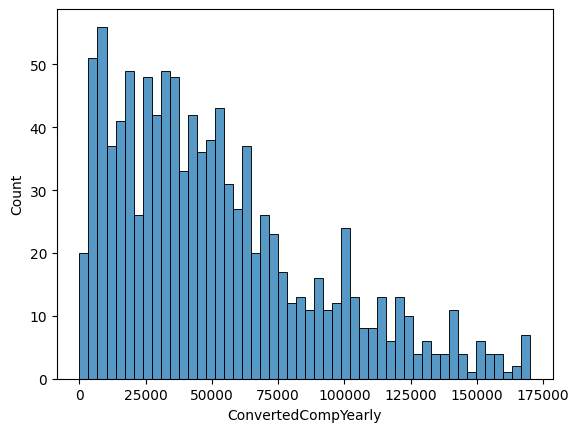

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



#handling suspicious outliers which can skew our conclusions but have minimal downside if ommitted.

#ignore outliers
percentile = dfa1d_filter_1["ConvertedCompYearly"].quantile(0.92)

# mask for outliers in ConvertedCompYearly
mask_percentile_ConvertedCompYearly = dfa1d_filter_1["ConvertedCompYearly"] < percentile

#show the distribution only for those that fall within percentile
sns.histplot(dfa1d_filter_1[mask_percentile_ConvertedCompYearly]["ConvertedCompYearly"], bins=50)
percentile

### Show answers to the question "how they learned to code"

LearnCode_Books / Physical media                                    38993.0
LearnCode_Coding Bootcamp                                            7731.0
LearnCode_Colleague                                                 13188.0
LearnCode_Friend or family member                                    9986.0
LearnCode_Hackathons (virtual or in-person)                          5268.0
LearnCode_On the job training                                       28522.0
LearnCode_Online Courses or Certification                           33378.0
LearnCode_Other (please specify):                                    3558.0
LearnCode_Other online resources (e.g. - videos - blogs - forum)    50755.0
LearnCode_School (i.e. - University - College - etc)                44505.0
dtype: float64

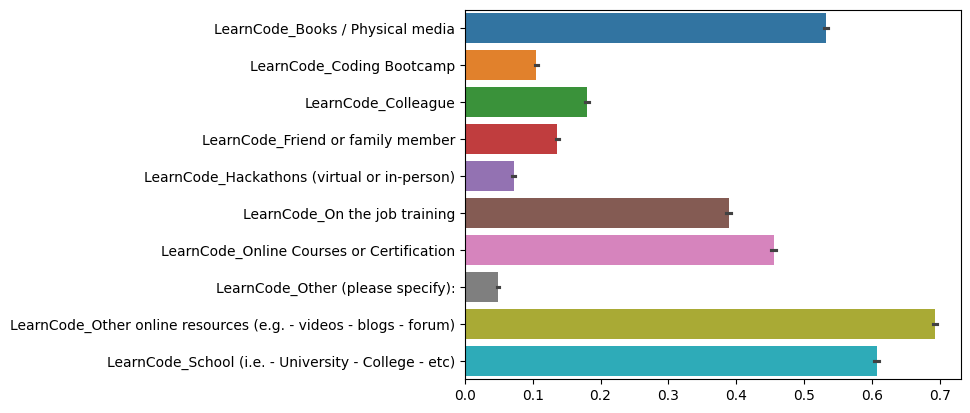

In [27]:
dfa1d_LearnCode = dfa1d.filter(regex='^LearnCode_')

sns.barplot(data=dfa1d_LearnCode, orient='h')

sum_LearnCode_OnlineCC = dfa1d_LearnCode.sum()
sum_LearnCode_OnlineCC

### Show answers to the question "What code do you write outside of work"

<Axes: >

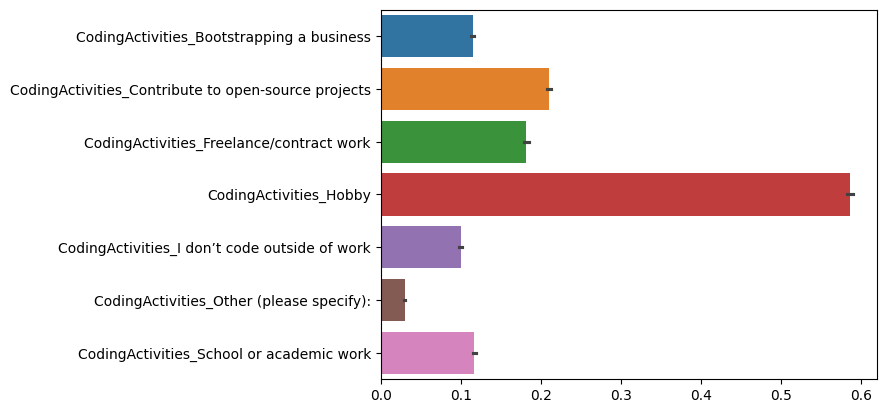

In [28]:
dfa1d_CodingActivities = dfa1d.filter(regex='^CodingActivities_')

sns.barplot(data=dfa1d_CodingActivities, orient='h')


### Exclude soft skills and people managers from above studies. 

In [29]:
# TO RECONSIDER: in reality this filter excludes those who didn't answer that question.

mask_contributor_not_manager = dfa1d["ICorPM"] == "Independent contributor"

dfa1d_contributors = dfa1d[mask_contributor_not_manager]

dfa1d_contributors_LearnCode = dfa1d_contributors.filter(regex='^LearnCode_')

sns.barplot(data=dfa1d_LearnCode, orient='h')

sum_contributors_LearnCode_OnlineCC = dfa1d_contributors_LearnCode.sum()
sum_contributors_LearnCode_OnlineCC


### Code outside of work or not: the mean salary for those who do vs those who don't


In [ ]:
#two masks for two plots

mask_code_as_hobby = dfa1d["CodingActivities_Hobby"] == 1
mask_dont_code_as_hobby = dfa1d["CodingActivities_Hobby"] == 0

dfa1d_code_as_hobby = dfa1d[mask_code_as_hobby]

dfa1d_dont_code_as_hobby = dfa1d[mask_dont_code_as_hobby]

sns.displot(data=pd.concat([dfa1d_code_as_hobby.assign(dataset='dfa1d_code_as_hobby'), dfa1d_dont_code_as_hobby.assign(dataset='dfa1d_dont_code_as_hobby')]), x='ConvertedCompYearly', hue='dataset',  alpha=0.5)
plt.xlim(0, 225000)




(0.0, 225000.0)

In [ ]:
# more approrpriate plot to see the ratio of yes or no in each income group

dfa1d_filter_employed_datascientist = dfa1d[ mask_employed & mask_data_roles]

dfa1d_code_income = dfa1d_filter_employed_datascientist[["CodingActivities_Hobby", "ConvertedCompYearly", "Country"]].copy()

# need to deal again with NaN in all colums
dfa1d_code_income.dropna(subset=["CodingActivities_Hobby", "ConvertedCompYearly"],inplace=True)


# Define bins for income
bins = [0, 30e3, 40e3, 50e3, 60e3, 70e3, 80e3, 90e3, 100e3, 125e3, 150e3, 175e3, 200e3, 250e3, 350e3, 450e3, 750e3, 100e4, 100e5]
labels = bins[1:]

# Create a new column for income groups
dfa1d_code_income['income_group'] = pd.cut(dfa1d_code_income['ConvertedCompYearly'], bins=bins, labels=labels, right=False)


In [ ]:




#grouped_dfa1d_code_income = dfa1d_code_income.groupby('income_group')
#group_counts = dfa1d_code_income['income_group'].value_counts()
#print(group_counts)

# need to keep the flag
group_flag_counts = dfa1d_code_income.groupby(['income_group', 'CodingActivities_Hobby']).size().reset_index(name='count')
#print(group_flag_counts)

#map the 0 and 1 to No and Yes for better visuals
group_flag_counts['CodingActivities_Hobby'] = group_flag_counts['CodingActivities_Hobby'].map({1.0: 'Yes', 0.0: 'No'})
#print(group_flag_counts)



group_flag_counts['income_group'] = group_flag_counts['income_group'].astype(int)





C:\Users\mariu\AppData\Local\Temp\ipykernel_812\2830012884.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_flag_counts = dfa1d_code_income.groupby(['income_group', 'CodingActivities_Hobby']).size().reset_index(name='count')


In [ ]:
#Select only one income group as one barplot
#data_plot = group_flag_counts[group_flag_counts['income_group']==50e3]
#print(data_plot.head())


#select those who do code as hobby
group_flag_counts_code_hobby = group_flag_counts[group_flag_counts['CodingActivities_Hobby']=='Yes'].copy()
#group_flag_counts_code_hobby.rename(columns = {'count':'Code_as_hobby'}, inplace = True)
#group_flag_counts_code_hobby.drop('CodingActivities_Hobby', axis=1,  inplace=True)
group_flag_counts_code_hobby.reset_index(inplace=True)
group_flag_counts_code_hobby.drop('index', axis=1,  inplace=True)
group_flag_counts_code_hobby.drop('CodingActivities_Hobby', axis=1,  inplace=True)
group_flag_counts_code_hobby = group_flag_counts_code_hobby.set_index('income_group').T



#select those who don't code as hobby
group_flag_counts_notcode_hobby = group_flag_counts[group_flag_counts['CodingActivities_Hobby']=='No'].copy()
group_flag_counts_notcode_hobby.reset_index(inplace=True)
group_flag_counts_notcode_hobby.drop('index', axis=1,  inplace=True)
group_flag_counts_notcode_hobby.drop('CodingActivities_Hobby', axis=1,  inplace=True)
group_flag_counts_notcode_hobby = group_flag_counts_notcode_hobby.set_index('income_group').T
#group_flag_counts_notcode_hobby.rename(columns = {'income_group':'Code as hobby'}, inplace = True)


# concatenate the two
#df1 = group_flag_counts_code_hobby.set_index('income_group')
#df2 = group_flag_counts_notcode_hobby.set_index('income_group')
group_flag_counts_horizontal = pd.concat([group_flag_counts_code_hobby, group_flag_counts_notcode_hobby], axis=0)
group_flag_counts_horizontal_reset = group_flag_counts_horizontal.reset_index()
group_flag_counts_horizontal_reset.drop('index', axis=1,  inplace=True)

group_flag_counts_horizontal_reset["Code as hobby"] = ["Yes", "No"]
group_flag_counts_horizontal_reset.set_index("Code as hobby", inplace=True)

#pivot to prepare for visuals

group_flag_counts_horizontal_reset[0:30]







income_group,30000,40000,50000,60000,70000,80000,90000,100000,125000,150000,175000,200000,250000,350000,450000,750000,1000000,10000000
Code as hobby,,,,,,,,,,,,,,,,,,
Yes,587,218,215,202,217,168,142,110,248,161,136,80,95,61,23,34,16,60
No,210,88,66,65,81,65,49,44,98,77,48,26,36,24,12,23,9,24


In [ ]:
group_flag_counts.head()


#category = income_group
#color = CodingActivities_Hobby
#percentage = count / percentage

# Calculate the total for each color
totals = group_flag_counts.groupby('income_group')['count'].sum()

# Compute percentages for each row
group_flag_counts['Percentage'] = group_flag_counts.apply(lambda row: (row['count'] / totals[row['income_group']]) * 100, axis=1)

group_flag_counts.head()


# Convert values to percentages
#group_flag_percentages = group_flag_counts.apply(lambda x: (x / x.sum()) * 100, axis=0)

#print(group_flag_percentages)

,income_group,CodingActivities_Hobby,count,Percentage
0,30000,No,210,26.348808
1,30000,Yes,587,73.651192
2,40000,No,88,28.758170
3,40000,Yes,218,71.241830
4,50000,No,66,23.487544


In [ ]:
#arrange for matplotlib
# Start by cutting unecessary
group_flag_counts.drop('count', axis=1,  inplace=True)

In [ ]:
#RECONSIDER not done well. not testing the data, anot doing a good join on solid foundation of same field as SQL does. to fix



group_by_code_flag_counts = group_flag_counts.sort_values(["CodingActivities_Hobby", "income_group"])

group_by_code_flag_counts.head()

#split


split_dataframes = np.array_split(group_by_code_flag_counts, 2)

split_dataframes[1]

# 2 times:


#rename
split_dataframes[0].rename(columns = {'Percentage':'Percentage_Code'}, inplace = True)
split_dataframes[1].rename(columns = {'Percentage':'Percentage_NotCode'}, inplace = True)


#drop
split_dataframes[0].drop('CodingActivities_Hobby', axis=1,  inplace=True)
split_dataframes[0].reset_index(inplace=True)
split_dataframes[0].drop('index', axis=1,  inplace=True)
split_dataframes[1].drop('CodingActivities_Hobby', axis=1,  inplace=True)
split_dataframes[1].reset_index(inplace=True)
split_dataframes[1].drop('index', axis=1,  inplace=True)


#concatenate well

split_dataframes[1].drop('income_group', axis=1,  inplace=True)
group_by_code_flag_counts_exploded = pd.concat([split_dataframes[0], split_dataframes[1]], axis=1, join='inner')

group_by_code_flag_counts_exploded.set_index("income_group", inplace=True)

group_by_code_flag_counts_exploded.head()

c:\Users\mariu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Percentage_Code,Percentage_NotCode
income_group,,
30000,26.348808,73.651192
40000,28.758170,71.241830
50000,23.487544,76.512456
60000,24.344569,75.655431
70000,27.181208,72.818792


In [ ]:
group_by_code_flag_counts_exploded.head()

,Percentage_Code,Percentage_NotCode
income_group,,
30000,26.348808,73.651192
40000,28.758170,71.241830
50000,23.487544,76.512456
60000,24.344569,75.655431
70000,27.181208,72.818792


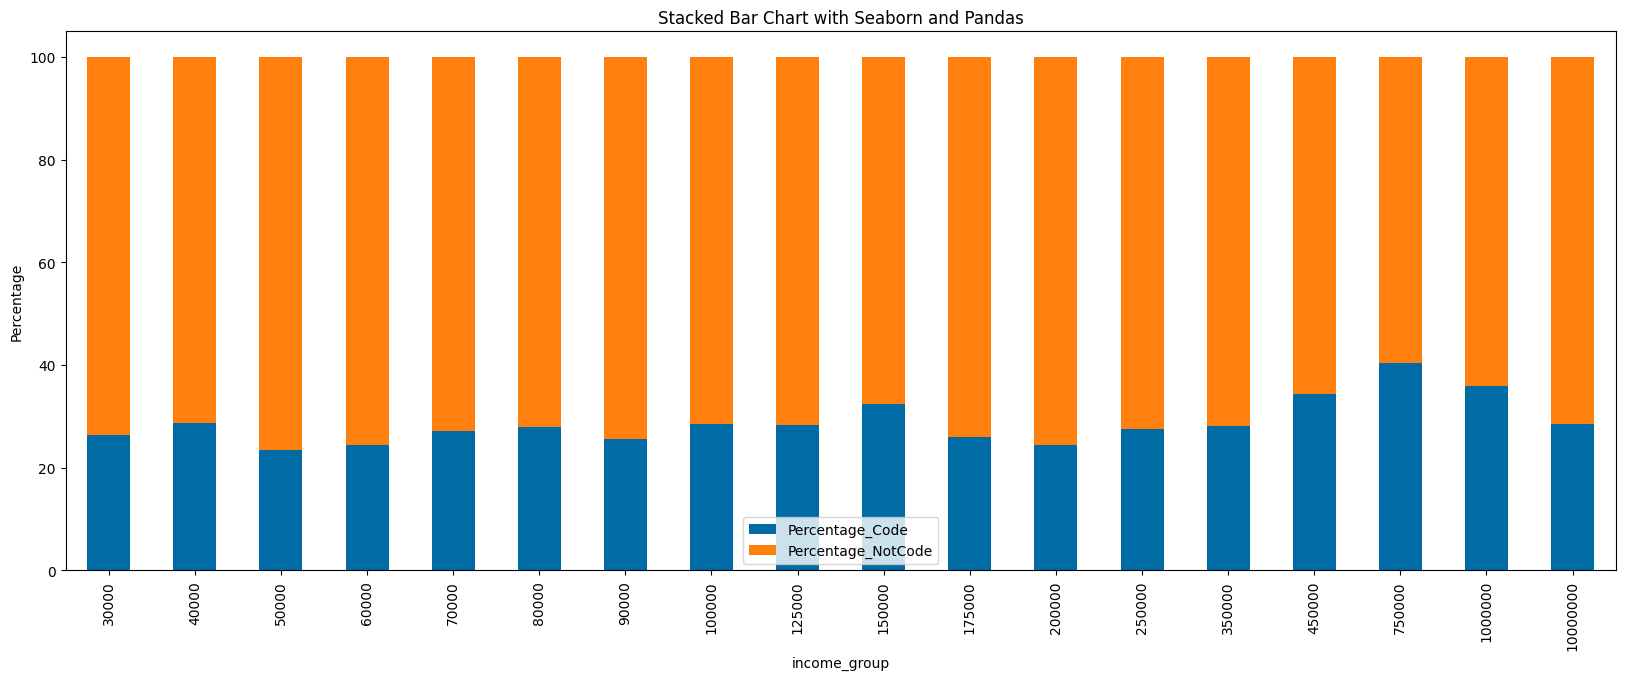

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 7))


# Plot
group_by_code_flag_counts_exploded.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Percentage')
ax.set_title('Stacked Bar Chart with Seaborn and Pandas')


# Show the plot
plt.show()


In [ ]:
#more than an hour have tried to make it more readable on x-axis.

In [ ]:
#now if want to have x,y,z need different data schema. so counterintuitive this system.



# to have the formatting abilities for the x-axis, need to make the data useful by having a good index

#group_by_code_flag_proper_index = group_by_code_flag_counts_exploded.reset_index()

# group_by_code_flag_proper_index


# Let's plot again

#fig, ax = plt.subplots(figsize=(20, 7))

#ax = df.plot(x='A', y='B', color='red', kind='line')

#group_by_code_flag_proper_index.plot(kind='bar', stacked=True, ax=ax, x='income_group', y='Percentage_Code' )
#ax.set_ylabel('Percentage')
#ax.set_title('Stacked Bar Chart with Seaborn and Pandas')


# Create a StrMethodFormatter to add commas to x-axis labels
#comma_formatter = ticker.StrMethodFormatter('{x:,.0f}')
#ax.xaxis.set_major_formatter(comma_formatter)


#plt.show()



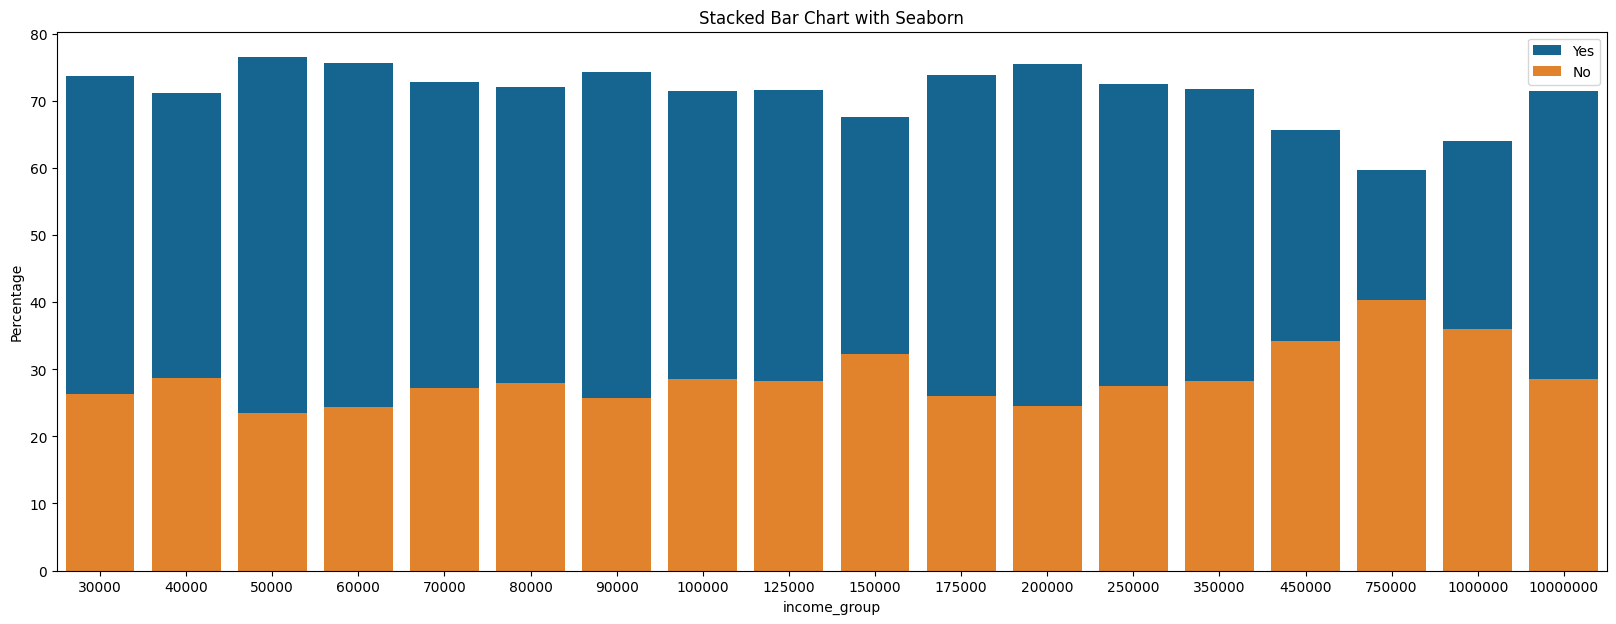

In [ ]:

# Nice graph but i dont think there is a way to make it stacked.

df = pd.DataFrame(group_flag_counts)

# Plot using Seaborn
plt.figure(figsize=(20, 7))
sns.barplot(data=df, x='income_group', y='Percentage', hue='CodingActivities_Hobby', hue_order=["Yes", "No"], dodge=False)
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Seaborn')
plt.legend(loc='upper right')
plt.show()


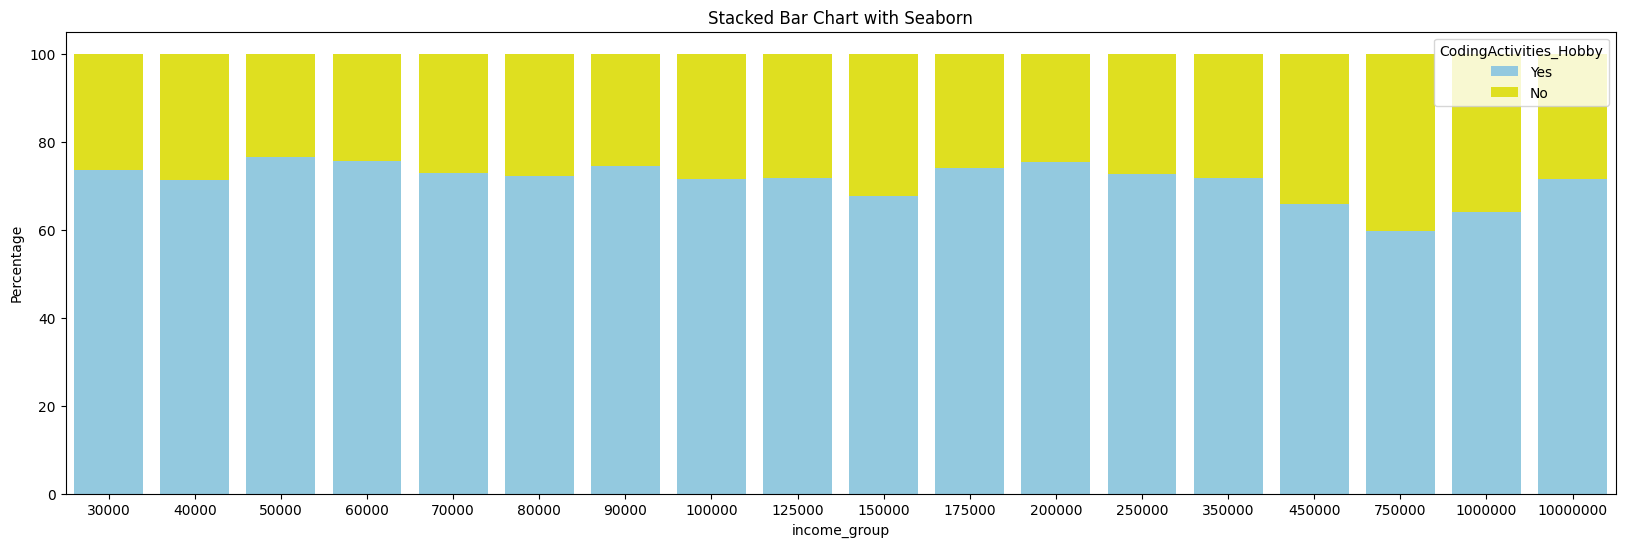

,income_group,CodingActivities_Hobby,Percentage
0,30000,No,26.348808
2,40000,No,28.758170
4,50000,No,23.487544
6,60000,No,24.344569
8,70000,No,27.181208


In [ ]:
# Pivot the DataFrame to create a stacked format

to_pivot_df = group_by_code_flag_counts.reset_index()
pivot_df = to_pivot_df.pivot(index='income_group', columns='CodingActivities_Hobby', values='Percentage')

# Plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(data=pivot_df, x=pivot_df.index, y=pivot_df['Yes'], color = 'skyblue', label='Yes')
sns.barplot(data=pivot_df, x=pivot_df.index, y=pivot_df['No'], color='yellow', label='No', bottom=pivot_df['Yes'])
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Seaborn')
plt.legend(loc='upper right', title='CodingActivities_Hobby')
plt.show()

group_by_code_flag_counts.head()

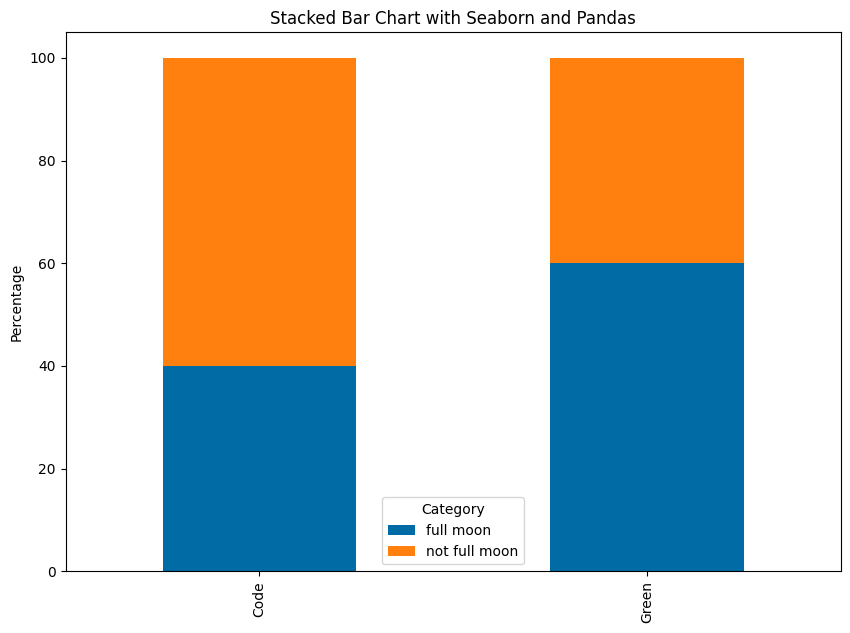

Category,full moon,not full moon
Code,40,60
Green,60,40


In [ ]:


# Sample data
data = {
    'Category': ['full moon', 'not full moon'],
    'Code': [40, 60],
    'Green': [60, 40]
}

df = pd.DataFrame(data).set_index('Category').T

# Plot
df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Seaborn and Pandas')
plt.show()

df.head()

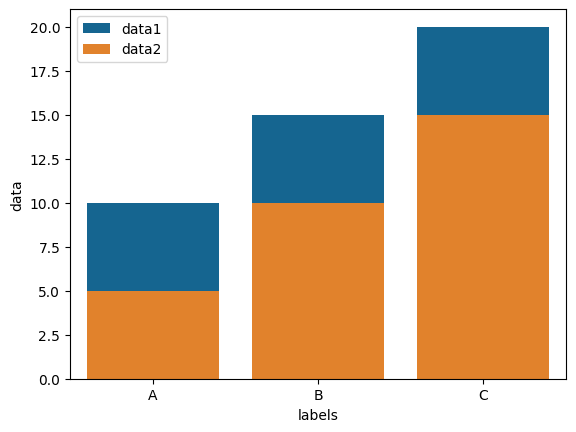

In [ ]:
import seaborn as sns
import pandas as pd

data = {
    'labels': ['A', 'A', 'B', 'B', 'C', 'C'],
    'data': [10, 5, 15, 10, 20, 15],
    'hue': ['data1', 'data2', 'data1', 'data2', 'data1', 'data2']
}

df = pd.DataFrame(data)
sns.barplot(x='labels', y='data', hue='hue', data=df, dodge=False)  # Set dodge to False

plt.legend()
plt.show()

In [ ]:
# review project movies for inspiration in steps and possibilities

In [ ]:
# Is the code as hobby the proper group, what if choose the other ones

In [ ]:
# Selecting only one geography, in order to eliminate the group skew: more respondnents from a certain geography
#  which has different income for other reasons than code as hobby (and is not linearly represented for code as hobby)



### Plot between years of professional coding exp and pay

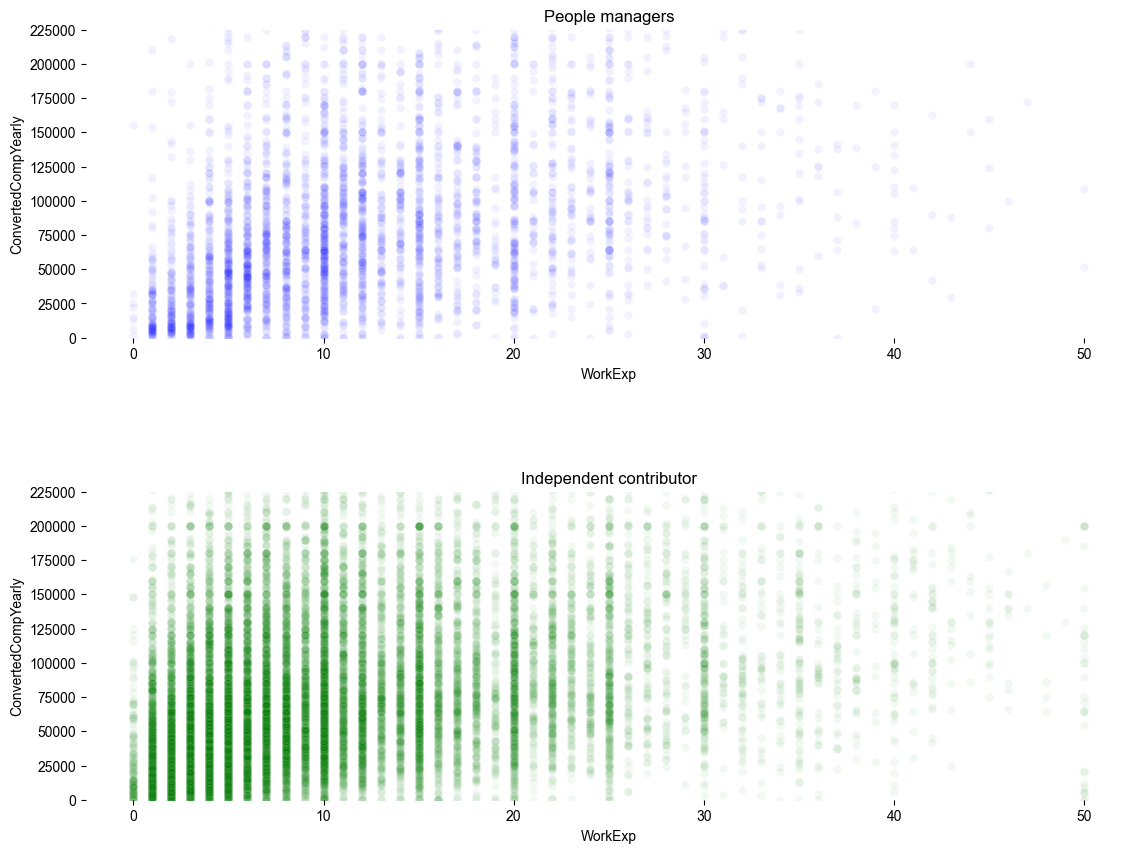

In [ ]:
mask_people_manager = dfa1d["ICorPM"] == "People manager"
mask_contributor_not_manager = dfa1d["ICorPM"] == "Independent contributor"

dfa1d_people_managers = dfa1d[mask_people_manager]
dfa1d_contributors = dfa1d[mask_contributor_not_manager]


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13.5, 10))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(data=dfa1d_people_managers, x = "WorkExp", y = "ConvertedCompYearly", color='blue', alpha = 0.05, ax=ax1)
#sns.lmplot(data=dfa1d_people_managers, x='WorkExp', y='ConvertedCompYearly', ax=ax1)

sns.scatterplot(data=dfa1d_contributors, x = "WorkExp", y = "ConvertedCompYearly", color='green', alpha = 0.05 , ax=ax2)
#sns.lmplot(data=dfa1d_contributors, x='WorkExp', y='ConvertedCompYearly', ax=ax2)

sns.axes_style("darkgrid")
sns.set(font='Monospace')

ax1.set_ylim(0, 225000)
ax2.set_ylim(0, 225000)

ax1.title.set_text("People managers")
ax2.title.set_text("Independent contributor")

plt.subplots_adjust(hspace=0.5)

plt.show()






In [ ]:
# plot for accomplished developers that dont have masters, share of have to have not

In [ ]:

# path to get to soft skills - the people managers what do they have in common
# confusion_matrix with some key chosen variables

""" 
df_matrix = dfa1d_people_managers[[ "Employment_Employed - full-time", "EdLevel", "WorkExp", "ConvertedCompYearly"]]

matrix = df_matrix.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show() 
"""




ValueError: could not convert string to float: '35-44 years old'